In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("dataset/insurance_claims_V3.csv")

In [4]:
df.shape


(1000, 128)

In [5]:
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size =0.2,random_state=12)

In [8]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [9]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    f1 = f1_score(y_test, ypred)

# Affichage du F1-score
    print("F1-score :", f1)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    CMTD = pd.crosstab(y_test,ypred, rownames=['Actual'], colnames=['Predicted'])
    fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
    sns.heatmap(CMTD, 
                xticklabels=['Fraudulant', 'Legit'],
                yticklabels=['Fraudulant', 'Legit'],
                annot=True,ax=ax1,
                linewidths=.2,linecolor="Darkblue", cmap="Blues")
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [11]:
LR = make_pipeline(StandardScaler(),LogisticRegression(random_state = 42))

F1-score : 0.6206896551724138
[[160  10]
 [ 12  18]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       170
         1.0       0.64      0.60      0.62        30

    accuracy                           0.89       200
   macro avg       0.79      0.77      0.78       200
weighted avg       0.89      0.89      0.89       200



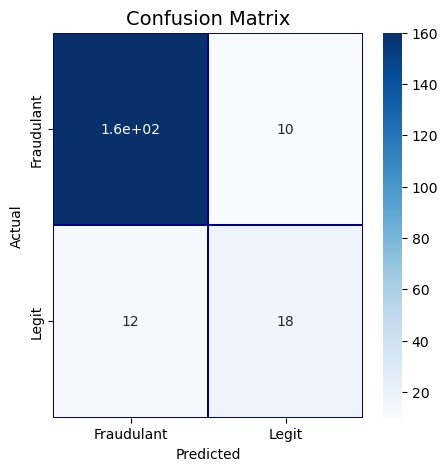

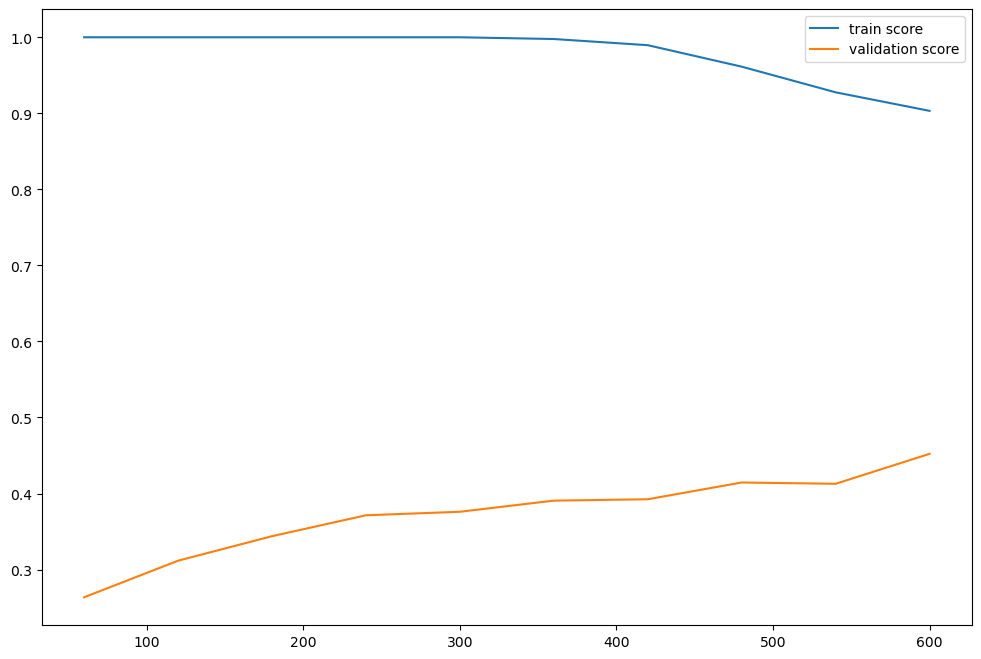

In [12]:
evaluation(LR)

### OPTIMISATION

In [13]:
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid_1 = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter for logistic regression
    'logisticregression__penalty': ['l1', 'l2'],  # Regularization type for logistic regression
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],  # Solver for logistic regression
}

In [17]:
grid = GridSearchCV(LR, param_grid_1, cv=5, scoring='recall')

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'logisticregression__C': 0.001, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
              precision    recall  f1-score   support

         0.0       0.96      0.75      0.84       170
         1.0       0.37      0.83      0.52        30

    accuracy                           0.77       200
   macro avg       0.67      0.79      0.68       200
weighted avg       0.87      0.77      0.80       200



F1-score : 0.5154639175257731
[[128  42]
 [  5  25]]
              precision    recall  f1-score   support

         0.0       0.96      0.75      0.84       170
         1.0       0.37      0.83      0.52        30

    accuracy                           0.77       200
   macro avg       0.67      0.79      0.68       200
weighted avg       0.87      0.77      0.80       200



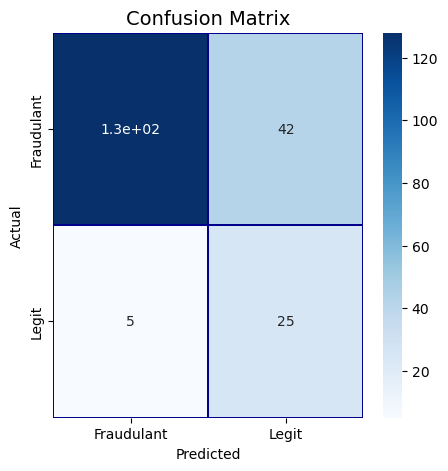

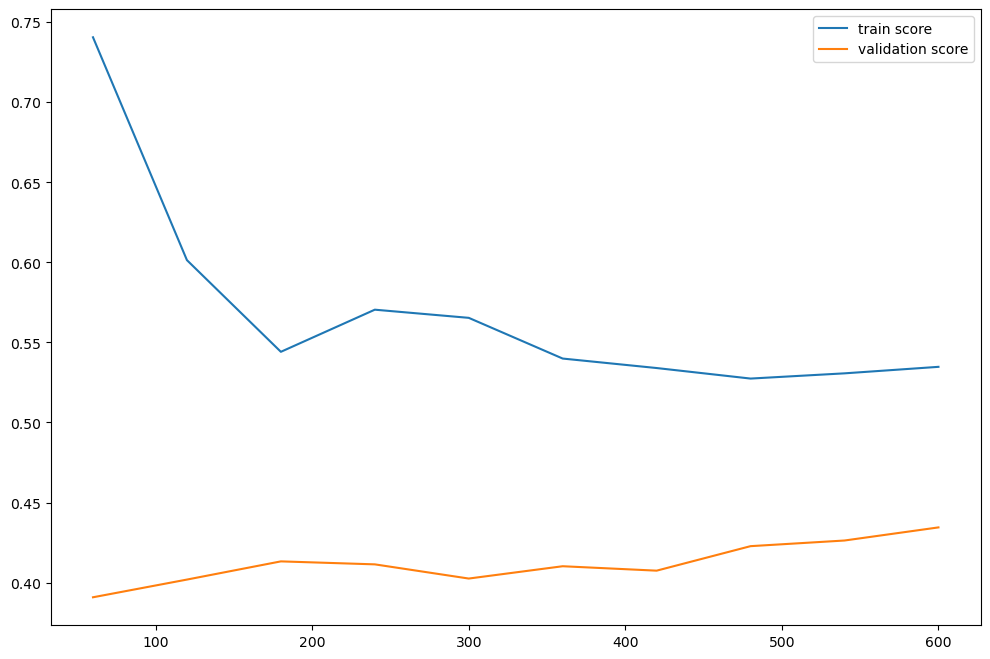

In [18]:
evaluation(grid.best_estimator_)